
# 🧩 Divide and Conquer Algorithms

This notebook introduces the **Divide and Conquer** algorithmic paradigm.  
It includes examples, visualizations, and comparisons with other strategies like Brute Force, Greedy, Dynamic Programming, and Backtracking.



## 1. Introduction

**Divide and Conquer** solves complex problems by breaking them into smaller, independent subproblems.

**Steps:**  
1. **Divide** – Split the problem into subproblems of the same type.  
2. **Conquer** – Solve each subproblem recursively.  
3. **Combine** – Merge the subproblem results into a final answer.


In [1]:

print("Divide and Conquer is a fundamental algorithm design strategy.")
print("It solves complex problems by breaking them into smaller, independent subproblems.")


Divide and Conquer is a fundamental algorithm design strategy.
It solves complex problems by breaking them into smaller, independent subproblems.



## 2. Binary Search Example

Binary Search is a classic Divide and Conquer algorithm that halves the search space on each step.


In [2]:

def binary_search(arr, target, low=0, high=None):
    if high is None:
        high = len(arr) - 1
    if low > high:
        return -1  # Not found

    mid = (low + high) // 2
    if arr[mid] == target:
        return mid
    elif arr[mid] > target:
        return binary_search(arr, target, low, mid - 1)
    else:
        return binary_search(arr, target, mid + 1, high)

arr = [1, 3, 5, 7, 9, 11]
target = 7
print(f"Searching for {target} in {arr} → index {binary_search(arr, target)}")


Searching for 7 in [1, 3, 5, 7, 9, 11] → index 3



## 3. Merge Sort Example

Merge Sort uses Divide and Conquer by splitting an array into halves, recursively sorting each half, and merging them.


In [3]:

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i]); i += 1
        else:
            result.append(right[j]); j += 1
    result += left[i:] + right[j:]
    return result

arr = [8, 3, 5, 2, 9, 1]
print(f"Original array: {arr}")
print(f"Sorted array:   {merge_sort(arr)}")


Original array: [8, 3, 5, 2, 9, 1]
Sorted array:   [1, 2, 3, 5, 8, 9]



## 4. Recursion Tree Visualization

The recursion tree helps visualize how Divide and Conquer breaks a problem into subproblems.


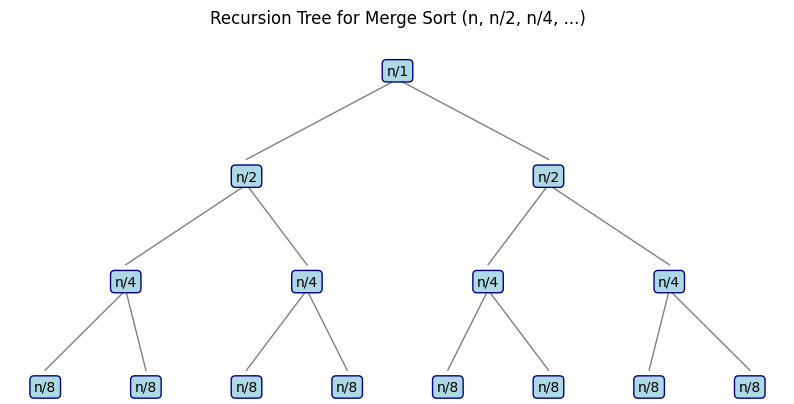

In [9]:
import matplotlib.pyplot as plt

def draw_recursion_tree(levels=4):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_axis_off()

    # Store node coordinates for each level
    coords = {}

    for level in range(levels):
        nodes = 2 ** level
        coords[level] = []
        for i in range(nodes):
            x = (i + 1) / (nodes + 1)
            y = 1 - (level / levels)
            coords[level].append((x, y))
            ax.text(
                x, y, f"n/{2**level}", ha="center", va="center", fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="lightblue", ec="navy")
            )

    # Draw connecting lines between parent and children
    for level in range(levels - 1):
        for i, (x, y) in enumerate(coords[level]):
            child_left_index = 2 * i
            child_right_index = 2 * i + 1
            for child_index in [child_left_index, child_right_index]:
                if child_index < len(coords[level + 1]):
                    x_child, y_child = coords[level + 1][child_index]
                    ax.plot([x, x_child], [y - 0.02, y_child + 0.04],
                            color="gray", linewidth=1)

    plt.title("Recursion Tree for Merge Sort (n, n/2, n/4, ...)", fontsize=12, pad=30)
    plt.subplots_adjust(top=0.75)
    plt.show()


draw_recursion_tree()




## 5. Complexity Analysis — Master Theorem

The recurrence for Merge Sort is:

\[ T(n) = 2T(n/2) + O(n) \]

By the **Master Theorem**, this gives:

\[ T(n) = O(n \log n) \]


In [11]:

from sympy import symbols, Function, Eq

n = symbols('n')
T = Function('T')
recurrence = Eq(T(n), 2*T(n/2) + n)
print("Recurrence relation for Merge Sort:")
print(recurrence)
print("Solution by Master Theorem → T(n) = O(n log n)")


Recurrence relation for Merge Sort:
Eq(T(n), n + 2*T(n/2))
Solution by Master Theorem → T(n) = O(n log n)



## 6. Comparing Algorithmic Paradigms

Let's see how Divide & Conquer compares with other strategies.


In [12]:

import pandas as pd

data = {
    'Approach': ['Brute Force', 'Greedy', 'Dynamic Programming', 'Backtracking', 'Divide & Conquer'],
    'Main Idea': [
        'Try all possible solutions',
        'Take best local choice',
        'Reuse overlapping subproblems',
        'Explore search space with pruning',
        'Split into independent subproblems'
    ],
    'Example': [
        'Exhaustive search',
        'Dijkstra, Huffman',
        'Knapsack, Fibonacci',
        'N-Queens',
        'Merge Sort, Binary Search'
    ]
}

comparison_df = pd.DataFrame(data)
comparison_df


,Approach,Main Idea,Example
0,Brute Force,Try all possible solutions,Exhaustive search
1,Greedy,Take best local choice,"Dijkstra, Huffman"
2,Dynamic Programming,Reuse overlapping subproblems,"Knapsack, Fibonacci"
3,Backtracking,Explore search space with pruning,N-Queens
4,Divide & Conquer,Split into independent subproblems,"Merge Sort, Binary Search"



## 7. Summary

- Divide and Conquer splits problems into smaller, independent parts.  
- It uses recursion and combination steps to reach an optimal solution.  
- Common examples: **Merge Sort**, **Quick Sort**, **Binary Search**, **Closest Pair of Points**.  
- Related paradigms: **Dynamic Programming** (overlapping subproblems) and **Greedy Algorithms** (no recursion, local choice).

🧠 *Key takeaway:* Divide and Conquer organizes computation hierarchically — solving complexity one level at a time.
